<a href="https://colab.research.google.com/github/suhkisoo/course-v3/blob/master/Colorization_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 5.3MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [1]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.vision.gan import *

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
path = Path('gdrive/My Drive/fastai_course/data/colorization_project')

In [5]:
pip install icrawler

In [8]:
$ patch < diff --git a/google.py b/google.py
index bfec04c..b46798a 100644
--- a/google.py
+++ b/google.py
@@ -141,24 +141,27 @@ class GoogleFeeder(Feeder):

 class GoogleParser(Parser):

-    def parse(self, response):
-        soup = BeautifulSoup(
-            response.content.decode('utf-8', 'ignore'), 'lxml')
-        image_divs = soup.find_all('script')
-        for div in image_divs:
-            txt = div.string
-            if txt is None or not txt.startswith('AF_initDataCallback'):
-                continue
-            if 'ds:1' not in txt:
-                continue
-            txt = re.sub(r"^AF_initDataCallback\({.*key: 'ds:(\d)'.+data:function\(\){return (.+)}}\);?$",
-                         "\\2", txt, 0, re.DOTALL)
-
-            meta = json.loads(txt)
-            data = meta[31][0][12][2]
-
-            uris = [img[1][3][0] for img in data if img[0] == 1]
-            return [{'file_url': uri} for uri in uris]
+   def parse(self, response):
+       soup = BeautifulSoup(
+           response.content.decode('utf-8', 'ignore'), 'lxml')
+       #image_divs = soup.find_all('script')
+       image_divs = soup.find_all(name='script')
+       for div in image_divs:
+           #txt = div.text
+           txt = str(div)
+           #if not txt.startswith('AF_initDataCallback'):
+           if 'AF_initDataCallback' not in txt:
+               continue
+           if 'ds:0' in txt or 'ds:1' not in txt:
+               continue
+           #txt = re.sub(r"^AF_initDataCallback\({.*key: 'ds:(\d)'.+data:function\(\){return (.+)}}\);?$",
+           #             "\\2", txt, 0, re.DOTALL)
+           #meta = json.loads(txt)
+           #data = meta[31][0][12][2]
+           #uris = [img[1][3][0] for img in data if img[0] == 1]
+           
+           uris = re.findall(r'http.*?\.(?:jpg|png|bmp)', txt)
+           return [{'file_url': uri} for uri in uris]


 class GoogleImageCrawler(Crawler):

SyntaxError: ignored

In [25]:
from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(
    feeder_threads=1,
    parser_threads=1,
    downloader_threads=4,
    storage={'root_dir': path})
filters = dict(
    color='color')

In [27]:
google_crawler.crawl(
    keyword='cat',
    filters={'date': ((2020, 1, 1), (2020, 12, 1))},
    max_num=1000,
    file_idx_offset=0)
google_crawler.crawl(
    keyword='worldwar2',
    filters={'date': ((2019, 1, 1), (2019, 12, 31))},
    max_num=1000,
    file_idx_offset='auto')
google_crawler.crawl(
    keyword='world war 2',
    filters={'date': ((2018, 1, 1), (2018, 12, 31))},
    max_num=1000,
    file_idx_offset='auto')

2020-12-15 16:28:50,521 - INFO - icrawler.crawler - start crawling...
2020-12-15 16:28:50,522 - INFO - icrawler.crawler - starting 1 feeder threads...
2020-12-15 16:28:50,523 - INFO - icrawler.crawler - starting 1 parser threads...
2020-12-15 16:28:50,538 - INFO - icrawler.crawler - starting 4 downloader threads...
2020-12-15 16:28:51,161 - INFO - parser - parsing result page https://www.google.com/search?q=cat&ijn=0&start=0&tbs=cdr%3A1%2Ccd_min%3A01%2F01%2F2020%2Ccd_max%3A12%2F01%2F2020&tbm=isch
Exception in thread parser-001:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/icrawler/parser.py", line 104, in worker_exec
    for task in self.parse(response, **kwargs):
  File "/usr/local/lib/python3.6/dist-packages/icrawler/builtin/google.py", line 157, in parse
   

In [4]:
path_hr = path/'images'
path_lr = path/'decolorize'

In [31]:
from PIL import Image, ImageDraw, ImageFont

class decolorizer(object):
    def __init__(self, path_lr, path_hr):
        self.path_lr = path_lr
        self.path_hr = path_hr              
        
    def __call__(self, fn, i):       
        dest = self.path_lr/fn.relative_to(self.path_hr)    
        dest.parent.mkdir(parents=True, exist_ok=True)
        img = PIL.Image.open(fn).convert("L")
        img.save(dest)

In [32]:
il = ImageList.from_folder(path_hr)
parallel(decolorizer(path_lr, path_hr), il.items)

In [5]:
bs,size=32, 128
arch = models.resnet34

## Pre-train generator

In [6]:
arch = models.resnet34
src = ImageImageList.from_folder(path_lr).split_by_rand_pct(0.1, seed=42)

In [7]:
def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_hr/x.name)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [8]:
data_gen = get_data(bs,size)

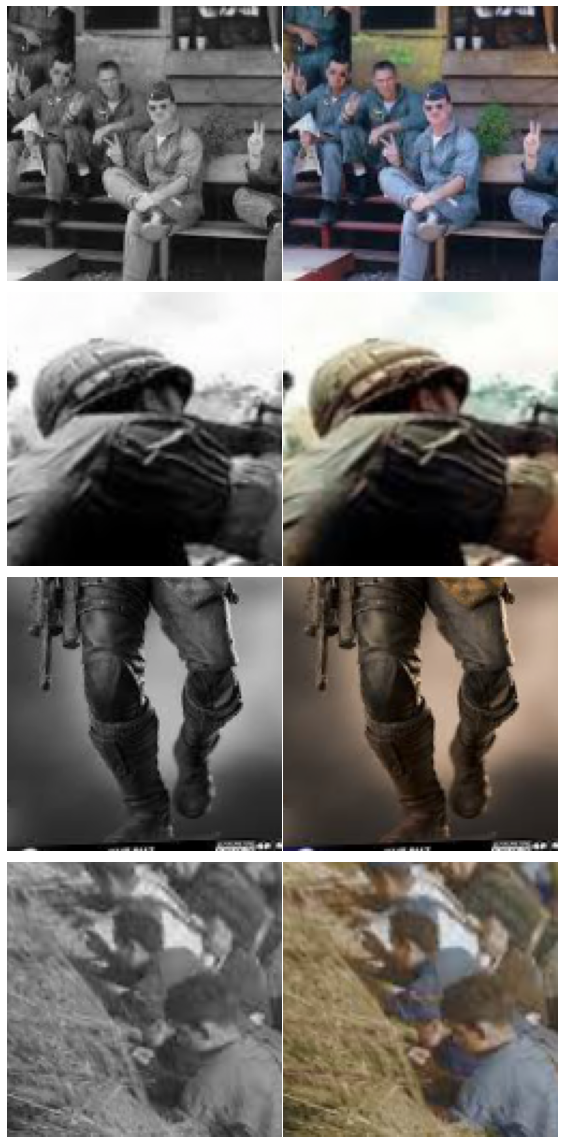

In [9]:
data_gen.show_batch(4)

In [10]:
wd = 1e-3

In [11]:
y_range = (-3.,3.)

In [12]:
loss_gen = MSELossFlat()

In [13]:
def create_gen_learner():
    return unet_learner(data_gen, arch, wd=wd, blur=True, norm_type=NormType.Weight,
                         self_attention=True, y_range=y_range, loss_func=loss_gen)

In [14]:
learn_gen = create_gen_learner()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn_gen.fit_one_cycle(2, pct_start=0.8)

In [16]:
learn_gen.unfreeze()

In [17]:
learn_gen.fit_one_cycle(3, slice(1e-6,1e-3))

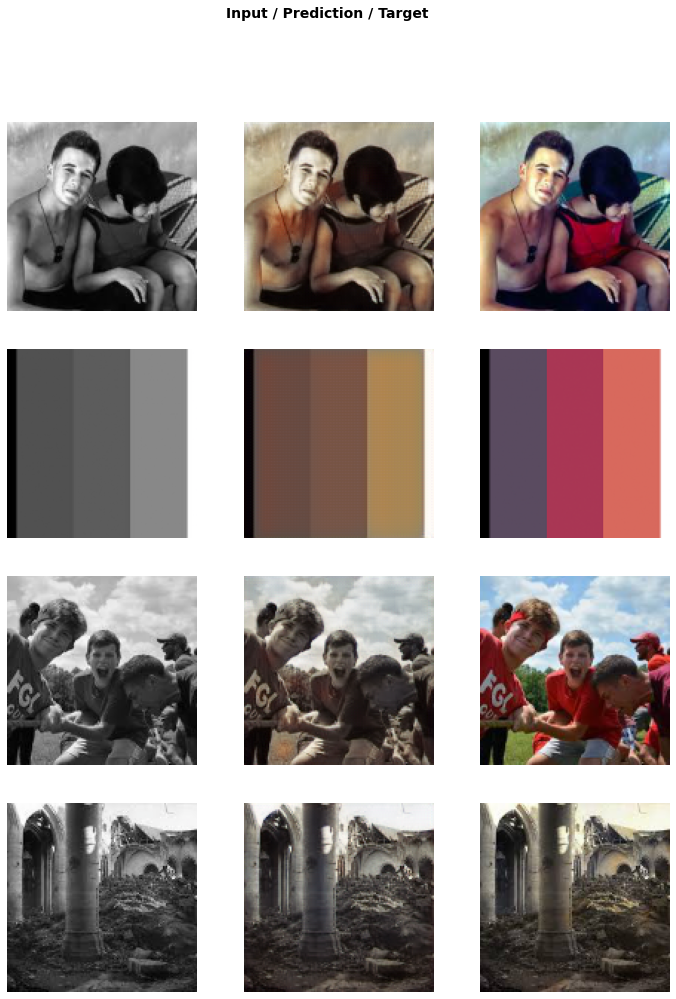

In [48]:
learn_gen.show_results(rows=4)

In [19]:
learn_gen.save('gen-pre2')

## Save generated images

In [20]:
learn_gen.load('gen-pre2');

In [21]:
name_gen = 'image_gen'
path_gen = path/name_gen

In [22]:
# shutil.rmtree(path_gen)

In [23]:
path_gen.mkdir(exist_ok=True)

In [24]:
def save_preds(dl):
    i=0
    names = dl.dataset.items
    
    for b in dl:
        preds = learn_gen.pred_batch(batch=b, reconstruct=True)
        for o in preds:
            o.save(path_gen/names[i].name)
            i += 1

In [25]:
save_preds(data_gen.fix_dl)

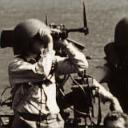

In [26]:
PIL.Image.open(path_gen.ls()[0])

## Train critic

In [27]:
learn_gen=None
gc.collect()

22

Pretrain the critic on crappy vs not crappy.

In [28]:
def get_crit_data(classes, bs, size):
    src = ImageList.from_folder(path, include=classes).split_by_rand_pct(0.1, seed=42)
    ll = src.label_from_folder(classes=classes)
    data = (ll.transform(get_transforms(max_zoom=2.), size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    data.c = 3
    return data

In [29]:
data_crit = get_crit_data([name_gen, 'images'], bs=bs, size=size)

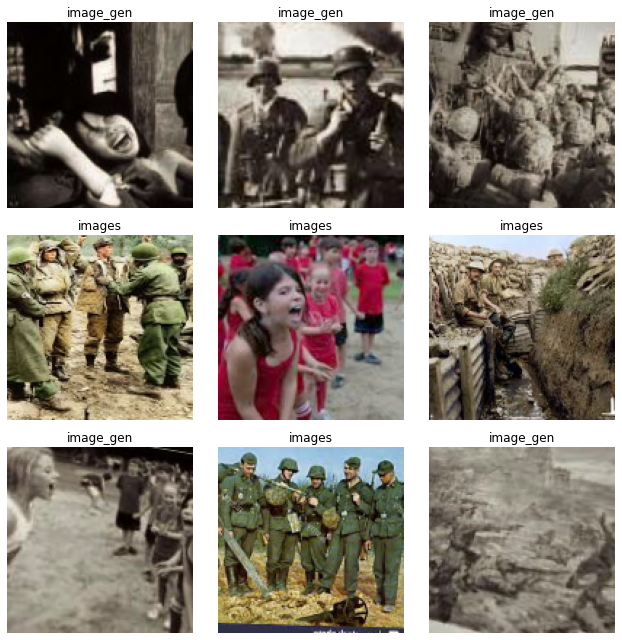

In [30]:
data_crit.show_batch(rows=3, ds_type=DatasetType.Train, imgsize=3)

In [31]:
loss_critic = AdaptiveLoss(nn.BCEWithLogitsLoss())

In [32]:
def create_critic_learner(data, metrics):
    return Learner(data, gan_critic(), metrics=metrics, loss_func=loss_critic, wd=wd)

In [33]:
learn_critic = create_critic_learner(data_crit, accuracy_thresh_expand)

In [34]:
learn_critic.fit_one_cycle(6, 1e-3)

In [35]:
learn_critic.save('critic-pre2')

## GAN

Now we'll combine those pretrained model in a GAN.

In [36]:
learn_crit=None
learn_gen=None
gc.collect()

19450

In [37]:
data_crit = get_crit_data(['crappy', 'images'], bs=bs, size=size)

In [38]:
learn_crit = create_critic_learner(data_crit, metrics=None).load('critic-pre2')

In [39]:
learn_gen = create_gen_learner().load('gen-pre2')

To define a GAN Learner, we just have to specify the learner objects foor the generator and the critic. The switcher is a callback that decides when to switch from discriminator to generator and vice versa. Here we do as many iterations of the discriminator as needed to get its loss back < 0.5 then one iteration of the generator.

The loss of the critic is given by `learn_crit.loss_func`. We take the average of this loss function on the batch of real predictions (target 1) and the batch of fake predicitions (target 0). 

The loss of the generator is weighted sum (weights in `weights_gen`) of `learn_crit.loss_func` on the batch of fake (passed throught the critic to become predictions) with a target of 1, and the `learn_gen.loss_func` applied to the output (batch of fake) and the target (corresponding batch of superres images).

In [40]:
switcher = partial(AdaptiveGANSwitcher, critic_thresh=0.65)
learn = GANLearner.from_learners(learn_gen, learn_crit, weights_gen=(1.,50.), show_img=False, switcher=switcher,
                                 opt_func=partial(optim.Adam, betas=(0.,0.99)), wd=wd)
learn.callback_fns.append(partial(GANDiscriminativeLR, mult_lr=5.))

In [41]:
lr = 1e-4

In [42]:
learn.fit(40,lr)

In [43]:
learn.save('gan-1c')

In [44]:
learn.data=get_data(16,192)

In [45]:
learn.fit(10,lr/2)

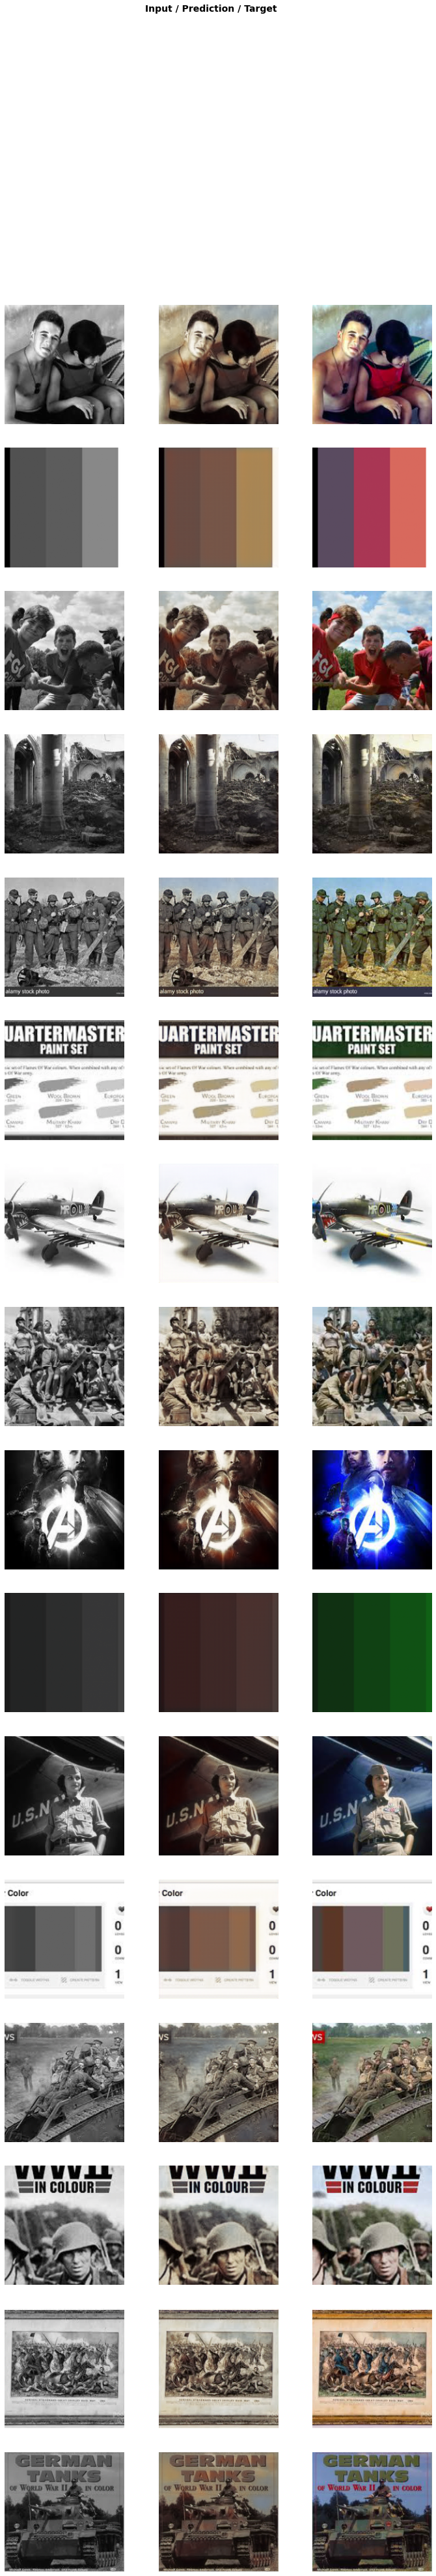

In [46]:
learn.show_results(rows=16)

In [47]:
learn.save('gan-1c')

# Visualization method

In [52]:
uploaded_file = st.file_uploader("upload a black&white photo", type=['jpg','png','jpeg'])
   
   if uploaded_file is not None:
      g = io.BytesIO(uploaded_file.read())  # BytesIO Object
      temporary_location = "image/temp.jpg"
   
      with open(temporary_location, 'wb') as out:  # Open temporary file as bytes
         out.write(g.read())  # Read bytes into file
         # close file
         out.close()
   resize_one("image/temp.jpg",img_size=800)
   st.image("image/temp.jpg",width=800)

IndentationError: ignored

In [ ]:
colorizer = get_image_colorizer(artistic=False)

In [ ]:
source_url = '' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')